In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst

# Two-level BEC

In [2]:
# Ground-state: E=0
# First excited state: energy E
# Temperature unit: E/kB
N=10000 # total number of particles 

# Two-level BEC without degeneracy

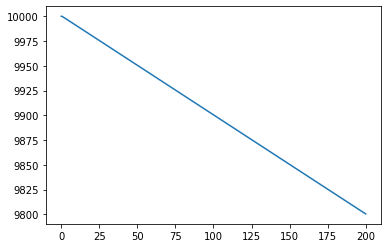

In [3]:
# http://faculty.washington.edu/goussiou/486_W15/Saxberg_BoseEinstein.pdf
def Nexc(N,T):
    ### mean number of bosons in excited state
    r=np.exp(-1/T)
    return (r-(N+1-N*r)*r**(N+1))/(1-r)/(1-r**(N+1))

T=np.arange(0.01,200,0.01)
plt.plot(T,N-Nexc(N,T))
plt.show()
# no critical temperature visible (actually infinite)

# Two-level BEC with degeneracy 

In [6]:
N=2000
g=10000
def x(N,g,T): # exp(-mu/kB T) should be larger than 1 and tend to 1 for T->0
    r1=np.exp(1/T) # r^{-1}
    b=r1+1+(r1+g)/N
    return (b+np.sqrt(b**2-4*r1*(g+1)/N-4*r1))/2/r1

Tc=1/np.log(1+np.float(g)/N)
print ('Critical temperature estimate =', Tc)
print (cst.Boltzmann*170e-9*np.log(3))
print (2.58e-30/cst.Boltzmann/np.log(3))

Critical temperature estimate = 0.5581106265512472
2.578555631685845e-30
1.7009522486557554e-07


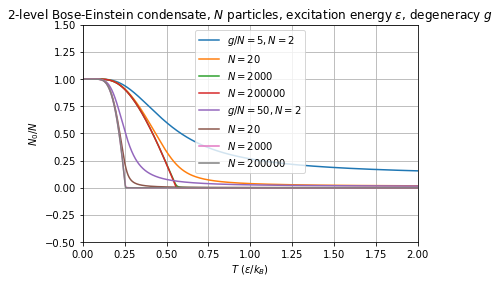

In [7]:
Tmax=(3*Tc).astype(int)+1
T=np.arange(0.01,Tmax,0.001)
#plt.plot(T,x(N,g,T))
#plt.plot(T,1/(x(N,g,T)-1)/N, T, g/(np.exp(1/T)*x(N,g,T)-1)/N)
plt.plot(T, 1/(x(N/1000,g/1000,T)-1)/(N/1000), T, 1/(x(N/100,g/100,T)-1)/(N/100),
         T, 1/(x(N,g,T)-1)/N, T, 1/(x(N*100,g*100,T)-1)/100/N)
plt.plot(T, 1/(x(N/1000,g/100,T)-1)/(N/1000), T, 1/(x(N/100,g/10,T)-1)/(N/100),
         T, 1/(x(N,g*10,T)-1)/N, T,1/(x(N*100,g*1000,T)-1)/100/N,)
plt.grid()
plt.xlim(0,Tmax)
plt.ylim(-0.5,1.5)
plt.title('2-level Bose-Einstein condensate, $N$ particles, excitation energy $\epsilon$, degeneracy $g$')
plt.xlabel('$T \ (\epsilon/k_B$)')
plt.ylabel('$N_0/N$')
plt.legend(['$g/N=5, N=2$', '$N=20$', '$N=2000$', '$N=200000$', '$g/N=50, N=2$', '$N=20$', '$N=2000$', '$N=200000$'])
plt.show()